In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random

plt.ion()

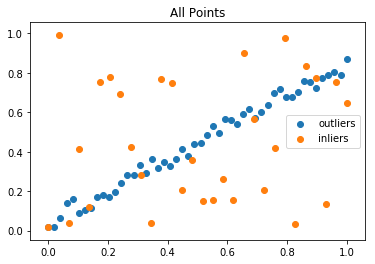

In [79]:
x_outliers = np.linspace(0,1,30)
y_outliers = np.random.rand(30)

x_data = np.linspace(0,1,50)
y_data = x_data*0.8 + np.random.rand(50)*0.1

all_x = np.concatenate((x_data, x_outliers))
all_y = np.concatenate((y_data, y_outliers))

plt.scatter(x_data, y_data, label="outliers")
plt.scatter(x_outliers, y_outliers, label="inliers")
plt.legend()
plt.title("All Points")

plt.show()


## RANSAC Algorithm
1: Select randomly the minimum number of points required to determine the model
parameters.

2: Solve for the parameters of the model.

3: Determine how many points from the set of all points fit with a predefined tolerance.

Point to line distance: $\operatorname{distance}(ax+by+c=0, (x_0, y_0)) = \frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}. $

4: If the fraction of the number of inliers over the total number points in the set
exceeds a predefined threshold τ , re-estimate the model parameters using all the
identified inliers and terminate.

5: Otherwise, repeat steps 1 through 4 (maximum of N times).


In [80]:
def dist(a,b,point):
    return np.absolute(a * point[0] - point[1] + b ) / np.sqrt(np.power(a,2) + 1)

Great! I have found 55 inliers with 2 iterations!


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


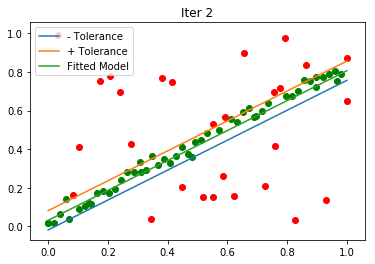

In [81]:
m = 5 #min set of points to define model
n = 25 #min set of points to stop de algorithm
max_iters = 50
iteration = 0
tolerance = .05
selected_points_x = []
not_selected_points = []

idx = np.arange(len(all_x))

while (iteration < max_iters) and len(selected_points_x) < n:
    selected_points_x = []
    selected_points_y = []
    not_selected_points_x = []
    not_selected_points_y = []

    random.shuffle(idx)

    rand_x = []
    rand_y = []

    for i in idx[0:m]:
        rand_x.append(all_x[i])
        rand_y.append(all_y[i])

    rand_x = np.array(rand_x)
    rand_y = np.array(rand_y)
        
    a,b = np.linalg.lstsq(np.vstack([rand_x, np.ones(len(rand_x))]).T, rand_y)[0]
    

    for i in range(len(all_x)):
        point = [all_x[i], all_y[i]]
        distance = dist(a, b, point)
        if distance < tolerance:
            selected_points_x.append(all_x[i])
            selected_points_y.append(all_y[i])
        else: 
            not_selected_points_x.append(all_x[i])
            not_selected_points_y.append(all_y[i])
    
    selected_points = np.array(selected_points)
    not_selected_points = np.array(not_selected_points)
        
    iteration += 1

            
a,b = np.linalg.lstsq(np.vstack([selected_points_x, np.ones(len(selected_points_x))]).T, selected_points_y)[0]
selected_points_x = []
selected_points_y = []
not_selected_points_x = []
not_selected_points_y = []

for i in range(len(all_x)):
    point = [all_x[i], all_y[i]]
    distance = dist(a, b, point)
    if distance < tolerance:
        selected_points_x.append(all_x[i])
        selected_points_y.append(all_y[i])
    else: 
        not_selected_points_x.append(all_x[i])
        not_selected_points_y.append(all_y[i])

    
plt.figure()
plt.scatter(not_selected_points_x, not_selected_points_y, color="r")
plt.scatter(selected_points_x, selected_points_y, color="g")
plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*a + b - tolerance, label="- Tolerance")
plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*a + b + tolerance, label="+ Tolerance")
plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*a + b, label="Fitted Model")
plt.legend()
plt.title("Iter {}".format(iteration))
plt.plot()    

print("Great! I have found {} inliers with {} iterations!".format(len(selected_points), iteration))